# [#0] Co w trawie piszczy -- czyli o dźwięku słów kilka ... 
---
### Witaj Drogi Czytelniku!   

Trafiłeś tutaj zapewnie dlatego, że jesteś nieprzeciętnie zainteresowany podróżą międzygwiezdną, w której łączyć się będzie muzyka (poważna, albo i nie), analiza danych, matematyka, **danologia** (nie jest to nauka o serkach homogenizowanych, tylko poważna sprawa. Tak, tak ... wiem, to spolszeczenie poważnego `Data Science` brzmi przezabawnie, no ale wobec tego - czemu pozbawiać się tej szczypty humoru?) i wiele innych planet w naukowym uniwersum, które zdażyło mi się odwiedzić. (No dobra, niektóre z nich widziałem tylko przez [lunetę Galileusza](https://pl.wikipedia.org/wiki/Luneta_Galileusza)). Jeśli natomiast Twoja przestrzeń zainteresowań nie ma kompletnie nic wspólnego z tym, o czym przed chwilą wspomniałem, to tym bardziej cieszę się, że tu trafiłeś. I zapraszam do tej przygody. Ponadto, jak pewnie nie trudno zauważyć (przyznaj, że przeskrolowałeś artykuł, zanim dotarłeś do tego zdania?!), oprócz nieskładnej polszczyzny, będę posługiwał się w trakcie tej podróży językiem `python`. Co prawda, nie ukończyłem żadnego kursu kodowania w tym języku, ale matura z polskiego też nie poszła mi najlepiej, więc czym tu się przejmować. Większe dramaty ludzi w życiu spotykają. (A'propos kursu kodowania - moja Małżonka stwierdziła, że to taki kurs dla listonoszy, gdzie w trakcie egzaminu liczy się tylko to, kto pierwszy wykrzyczy egzaminatorowi, że z kopertą sygnowaną kodem 26-612 pospiesznie jedzie do Radomia). 

Dobrze, wejdźmy zatem w tę opowieść, której preludium będzie dotykało rzeczy podstawowej i jednocześnie pozwoli nam pójść dalej w poważne rozważania - **Czym jest dźwięk?**  - No nie powiesz mi, że nigdy nie zastanawiało Cię, jak to się dzieje, że Spotify wysyła do Ciebie Twój ulubiony hit disco-polo, i on gna najpierw przez łącza internetowe (uwaga, za niedługo pewnie poleci przez nadajniki 5G), potem po układach scalonych Twojego smartfona trafia do złącza słuchawkowego (albo nadajnika Bluetooth :B ) i następnie po miedzianych drutach w kablu (albo wspomnianym *Niebieskim Kłem*) na membranę słuchawek i stamtąd wprost do Twojego ucha...? Nie, nie myślałeś nigdy o tym? W takim razie muszę na poważnie wziąć sobie do serca słowa moich najbliżych, że się o mnie martwią i że ja *...to zawsze byłem taki jakiś dziwny...* . Tak czy inaczej, chciałem zabrać się za budowę poważnego modelu `Machine Learning` wynoszącego mnie na wyżyny tajników tej sztuki magicznej, po czym uświadomiłem sobie, że w sumie to nie do końca wiem, co w moich danych siedzi. I czy ja w ogóle te dane mam? I od czego powinienem zacząć? Zszedłem więc z mentalnego Everestu dumy i samouwielbienia, zrobiłem sobie kawę i siedząc w gondoli na Gubałówkę (znów jedynie w myślach, jest przecież narodowa kwarantanna, to siedzę w domu i piszę!)  zacząłem od początku... od zrozumienia tego, jak okiełznać dźwięk w analizie danych! 

In [1]:
import numpy as np

import librosa 
import librosa.display

import matplotlib.pyplot as plt
%matplotlib inline

### Subiektywne wprowadzenie do cyfrowego przetwarzania sygnałów

```
> 1. Dźwięk - charakterystyka fizyczna   
> 2. Częstotliwość dźwięku   
> 3. Cyfrowa reprezentacja dźwięku   
> 4. Dziedziny przetwarzania sygnału   
> 5. Transformata Fouriera   
```

### Częstotliwość dźwięku -- co to jest? 

In [60]:
semitones = 12

[![aaa](pictures/keyboard_pitch4.jpg)](http://shakahara.com/piano/keyboard.html)

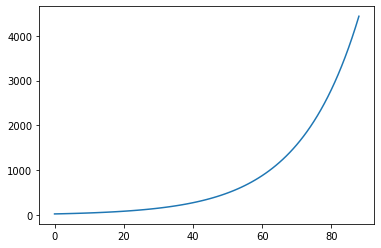

In [74]:
plt.plot(27.5*2**(np.linspace(0,88,89)/12));

In [61]:
440 * (2**(semitones/12))

880.0

In [51]:
librosa.note_to_hz("C5")

523.2511306011972

In [39]:
def create_simple_wave(hz=440, sample_rate=44100):
    
    xvalues = np.linspace(0, 2*np.pi*hz, int(sample_rate/2))

    return np.round(np.sin(xvalues),6)

In [40]:
simple_wave = create_simple_wave(880, 2**15) + create_simple_wave(440, 2**15) + create_simple_wave(220, 2**15)
simple_wave = simple_wave/3

###Transformata Fouriera
magnitude = np.abs(librosa.stft(simple_wave))
angle = np.angle(librosa.stft(simple_wave))

### i z powrotem
new_wave = np.round(librosa.istft(magnitude*np.exp(1j*angle)),6)

In [41]:
(simple_wave).min()

-0.7441843333333334

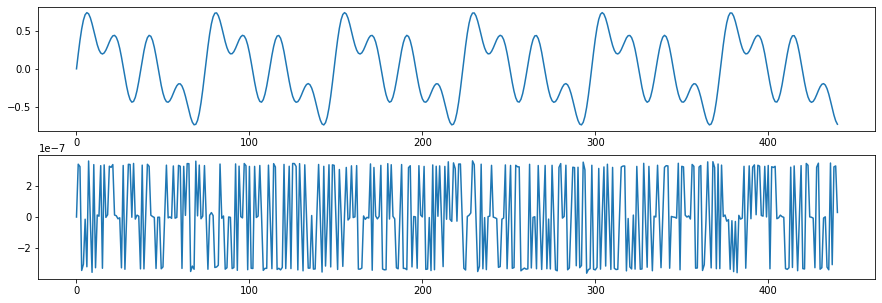

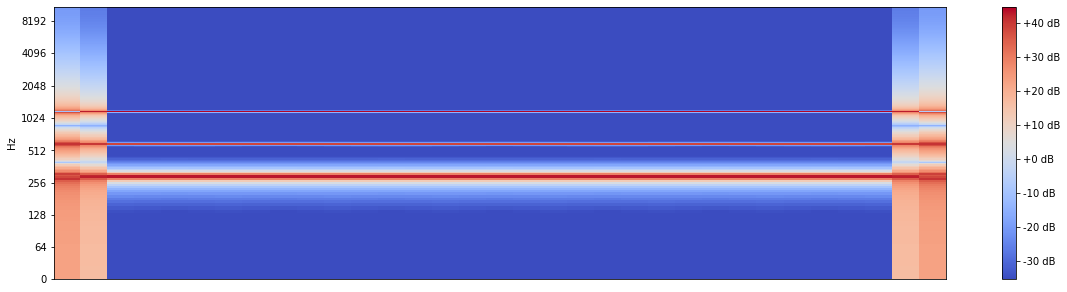

In [42]:
plt.figure(figsize=(15, 5))
plt.subplot(2,1,1)
plt.plot(simple_wave[:441]);

plt.subplot(2,1,2)
plt.plot(simple_wave[:441] - new_wave[:441]);

plt.figure(figsize=(20, 5))
C = librosa.amplitude_to_db(magnitude)
librosa.display.specshow(C, y_axis='log')
plt.colorbar(format='%+2.0f dB');

In [8]:
amplitude.shape

NameError: name 'amplitude' is not defined

In [253]:
librosa.db_to_amplitude(C)

array([[5.0420832e-02, 5.0420832e-02, 5.0420832e-02, ..., 5.0420832e-02,
        2.5064453e+01, 5.5700615e+01],
       [5.0420832e-02, 5.0420832e-02, 5.0420832e-02, ..., 5.0420832e-02,
        2.5114258e+01, 5.5794186e+01],
       [5.0420832e-02, 5.0420832e-02, 5.0420832e-02, ..., 5.0420832e-02,
        2.5248379e+01, 5.6055271e+01],
       ...,
       [5.0420832e-02, 5.0420832e-02, 5.0420832e-02, ..., 5.0420832e-02,
        9.8914154e-02, 2.1950784e-01],
       [5.0420832e-02, 5.0420832e-02, 5.0420832e-02, ..., 5.0420832e-02,
        9.8913506e-02, 2.1950625e-01],
       [5.0420832e-02, 5.0420832e-02, 5.0420832e-02, ..., 5.0420832e-02,
        9.8913290e-02, 2.1950573e-01]], dtype=float32)

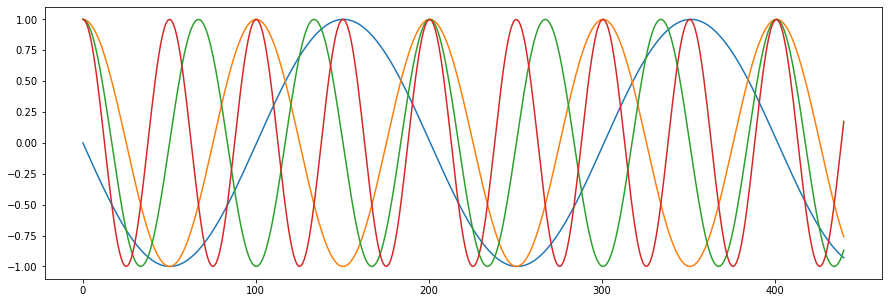

In [168]:
plt.figure(figsize=(15, 5))
base_hz = 440
plt.plot(create_simple_wave(base_hz, 44100, np.pi/2)[:441]);
plt.plot(create_simple_wave(base_hz*2, 44100)[:441]);
plt.plot(create_simple_wave(base_hz*3, 44100)[:441]);
plt.plot(create_simple_wave(base_hz*4, 44100)[:441]);

In [70]:
xvalues

array([0.00000000e+00, 1.42802904e-02, 2.85605808e-02, ...,
       6.29717967e+02, 6.29732247e+02, 6.29746527e+02])

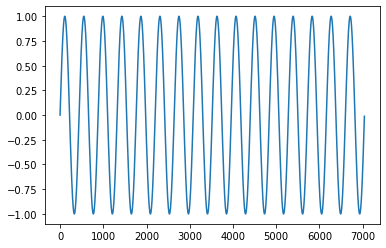

In [81]:
plt.plot(np.sin(xvalues[:440*16]));

In [28]:
xvalues

array([0.        , 0.06268938, 0.12537875, 0.18806813, 0.25075751,
       0.31344689, 0.37613626, 0.43882564, 0.50151502, 0.56420439,
       0.62689377, 0.68958315, 0.75227253, 0.8149619 , 0.87765128,
       0.94034066, 1.00303004, 1.06571941, 1.12840879, 1.19109817,
       1.25378754, 1.31647692, 1.3791663 , 1.44185568, 1.50454505,
       1.56723443, 1.62992381, 1.69261318, 1.75530256, 1.81799194,
       1.88068132, 1.94337069, 2.00606007, 2.06874945, 2.13143883,
       2.1941282 , 2.25681758, 2.31950696, 2.38219633, 2.44488571,
       2.50757509, 2.57026447, 2.63295384, 2.69564322, 2.7583326 ,
       2.82102197, 2.88371135, 2.94640073, 3.00909011, 3.07177948,
       3.13446886, 3.19715824, 3.25984762, 3.32253699, 3.38522637,
       3.44791575, 3.51060512, 3.5732945 , 3.63598388, 3.69867326,
       3.76136263, 3.82405201, 3.88674139, 3.94943076, 4.01212014,
       4.07480952, 4.1374989 , 4.20018827, 4.26287765, 4.32556703,
       4.38825641, 4.45094578, 4.51363516, 4.57632454, 4.63901

In [5]:
def create_tone_from_note(note_name, note_time):
    sample_rate = 44100
    hz = librosa.note_to_hz(note_name)
    
    length = sample_rate / float(hz)
    omega = np.pi * 2 / length
    xvalues = np.arange(int(length)) * omega
    onecycle = 4096 * np.sin(xvalues)
    samples = 1.0*np.resize(onecycle, (sample_rate*note_time,)).astype(np.int16)
    return samples

In [6]:
len(np.linspace(0,0,44100*4))

176400

In [14]:
abs(np.random.uniform(0,1))

0.6518906863953566

In [234]:
def create_tone_from_note(note_name, note_time):
    sample_rate = 44100
    hz_base = librosa.note_to_hz(note_name)
    samples = len(np.linspace(0,0,sample_rate*note_time))
    for i in range(1,17):
        hz = hz_base*i
        length = sample_rate / float(hz)
        omega = np.pi * 2 / length
        xvalues = np.arange(int(length)) * omega
        onecycle = 4096*abs(np.random.uniform(0,1)) * np.sin(xvalues)
        samples = samples + 1.0*np.resize(onecycle, (sample_rate*note_time,)).astype(np.int16)
        
    return samples

In [235]:
C = create_tone_from_note("C2",4)

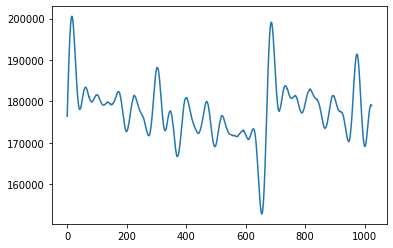

In [236]:
plt.plot(C[:1024]);

In [259]:
C = create_tone_from_note("C5",4)
F = create_tone_from_note("F5",4)
G = create_tone_from_note("G5",4)

In [260]:
def play_note(note_name,time=1):
    samples = create_tone_from_note(note_name, time)

    p = pyaudio.PyAudio()

    # for paFloat32 sample values must be in range [-1.0, 1.0]
    stream = p.open(format=pyaudio.paFloat32,
                    rate=sample_rate,
                    channels=1,
                    output=True)

    # play. May repeat with different volume values (if done interactively) 
    stream.write(samples)

    stream.stop_stream()
    stream.close()

    p.terminate()

In [268]:
for note, time in [('C5',8),('E5',8),('G5',4),
                   ('G5',8),('A5',8),('G5',8),('F5',8),('E5',8),('E5',8),('D5',8),('D5',8),('E5',4),('D5',8),
                   ('C5',8),('E5',8),('G5',4),
                   ('G5',8),('A5',8),('G5',8),('F5',8),('E5',8),('E5',8),('D5',8),('D5',4),
                   ('C5',8),('E5',8),('G5',4),
                   ('G5',8),('A5',8),('G5',8),('F5',8),('E5',8),('E5',8),('D5',8),('D5',8),('E5',4),('D5',8),
                   ('C5',8),('E5',8),('G5',4),
                   ('G5',8),('A5',8),('G5',8),('F5',8),('E5',8),('D5',8),('G5',8),('C5',4)]:
    play_note(note, int(16/time))

In [261]:
play_note("G5",4)
play_note("E5",4)
play_note("G5",4)
play_note("E5",4)
play_note("G5",4)
play_note("A5",2)
play_note("G5",2)
play_note("F5",2)
play_note("E5",2)
play_note("F5",4)

KeyboardInterrupt: 

In [57]:
sample_rate = 44100

def sine_wave(hz, peak, n_samples=sample_rate):
    """Compute N samples of a sine wave with given frequency and peak amplitude.
       Defaults to one second.
    """
    length = sample_rate / float(hz)
    omega = np.pi * 2 / length
    xvalues = np.arange(int(length)) * omega
    onecycle = peak * np.sin(xvalues)
    return np.resize(onecycle, (n_samples,)).astype(np.int16)

def square_wave(hz, peak, duty_cycle=.5, n_samples=sample_rate):
    """Compute N samples of a sine wave with given frequency and peak amplitude.
       Defaults to one second.
    """
    t = np.linspace(0, 1, 500 * 440/hz, endpoint=False)
    wave = scipy.signal.square(2 * np.pi * 5 * t, duty=duty_cycle)
    wave = np.resize(wave, (n_samples,))
    return (peak / 2 * wave.astype(np.int16))

# Play A (440Hz) for 1 second as a sine wave:
play_for(sine_wave(440, 4096), 1000)

# Play A-440 for 1 second as a square wave:
play_for(square_wave(440, 4096), 1000)

error: mixer not initialized